In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from geopandas import GeoDataFrame

In [29]:
# cleaned air quality data
df_annual = pd.read_csv('airquality_annual_cd.csv')
df_seasonal = pd.read_csv('airquality_seasonal_cd.csv')

# community districts shapefile
cd = gpd.read_file('data/shp/nycd.shp')

## Annual Avg by Community District


It only contains information for:
- Fine Particulate Matter (PM2.5)
- Nitrogen Dioxide (NO2)

In [15]:
df_annual.head(3)

,UniqueID,IndicatorID,Name,Measure,MeasureInfo,GeoTypeName,GeoJoinID,GeoPlaceName,Year,Start_Date,DataValue
0,170281,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),2010,12/01/2009,8.75
1,606068,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),2018,01/01/2018,6.19
2,170399,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),2012,12/01/2011,8.33


In [16]:
df_annualGeo = df_annual.merge(cd[['BoroCD','geometry']],left_on='GeoJoinID',right_on='BoroCD',how='left').drop(['BoroCD'], axis=1)
df_annualGeo.head(3)

,UniqueID,IndicatorID,Name,Measure,MeasureInfo,GeoTypeName,GeoJoinID,GeoPlaceName,Year,Start_Date,DataValue,geometry
0,170281,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),2010,12/01/2009,8.75,"MULTIPOLYGON (((947226.690 134695.710, 947277...."
1,606068,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),2018,01/01/2018,6.19,"MULTIPOLYGON (((947226.690 134695.710, 947277...."
2,170399,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),2012,12/01/2011,8.33,"MULTIPOLYGON (((947226.690 134695.710, 947277...."


In [ ]:
# divide by type
df_pm25 = df_annual[(df_annual.Name == 'Fine Particulate Matter (PM2.5)')] # pm2.5
df_no2 = df_annual[(df_annual.Name == 'Nitrogen Dioxide (NO2)')] # NO2

# group
df_pm25_grouped = df_pm25[['Year', 'DataValue']].groupby(by='Year').mean()
df_no2_grouped = df_no2[['Year', 'DataValue']].groupby(by='Year').mean()

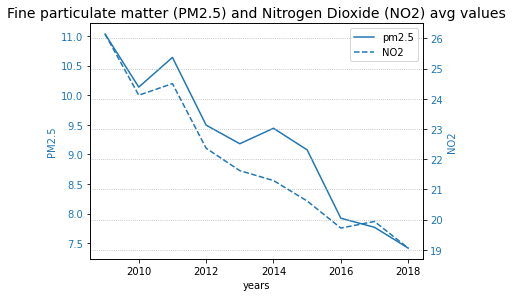

In [24]:
# Fine particulate matter (PM2.5) and Nitrogen Dioxide (NO2) avg values
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('years')
ax1.set_ylabel('PM2.5', color=color)
ax1.plot(df_pm25_grouped.index, df_pm25_grouped.DataValue, color=color, linestyle='solid', label='pm2.5')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('NO2', color=color)  # we already handled the x-label with ax1
ax2.plot(df_no2_grouped.index, df_no2_grouped.DataValue, color=color,linestyle='dashed', label='NO2')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Fine particulate matter (PM2.5) and Nitrogen Dioxide (NO2) avg values', fontsize=14)
plt.grid(linestyle='dotted')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

## Seasonal Avg by Community District

It contains information about:
- Fine Particulate Matter (PM2.5)
- Ozone (O3)
- Nitrogen Dioxide (NO2),
- Sulfur Dioxide (SO2)

In [32]:
df_seasonal.head(3)

,UniqueID,IndicatorID,Name,Measure,MeasureInfo,GeoTypeName,GeoJoinID,GeoPlaceName,Year,Season,Start_Date,DataValue
0,169573,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),2013,Summer,06/01/2013,9.13
1,547775,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),2017,Winter,12/01/2016,6.87
2,606069,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),2018,Summer,06/01/2018,7.36


In [33]:
df_seasonalGeo = df_seasonal.merge(cd[['BoroCD','geometry']],left_on='GeoJoinID',right_on='BoroCD',how='left').drop(['BoroCD'], axis=1)
df_seasonalGeo.head(3)

,UniqueID,IndicatorID,Name,Measure,MeasureInfo,GeoTypeName,GeoJoinID,GeoPlaceName,Year,Season,Start_Date,DataValue,geometry
0,169573,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),2013,Summer,06/01/2013,9.13,"MULTIPOLYGON (((947226.690 134695.710, 947277...."
1,547775,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),2017,Winter,12/01/2016,6.87,"MULTIPOLYGON (((947226.690 134695.710, 947277...."
2,606069,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),2018,Summer,06/01/2018,7.36,"MULTIPOLYGON (((947226.690 134695.710, 947277...."


In [36]:
# by type

df_s_PM25 = df_seasonal[(df_seasonal.Name == 'Fine Particulate Matter (PM2.5)')] # pm2.5
df_s_NO2 = df_seasonal[(df_seasonal.Name == 'Nitrogen Dioxide (NO2)')] # NO2
df_s_O3 = df_seasonal[(df_seasonal.Name == 'Ozone (O3)')] # 03 only summer
df_s_SO2 = df_seasonal[(df_seasonal.Name == 'Sulfur Dioxide (SO2)')] # SO2 only winter

In [37]:
# grouped

df_s_O3_grouped = df_s_O3[['Year', 'DataValue']].groupby(by='Year').mean()
df_s_SO2_grouped = df_s_SO2[['Year', 'DataValue']].groupby(by='Year').mean()

df_s_PM25_grouped_summer = df_s_PM25[(df_s_PM25.Season == 'Summer')][['Year', 'DataValue']].groupby(by='Year').mean()
df_s_PM25_grouped_winter = df_s_PM25[(df_s_PM25.Season == 'Winter')][['Year', 'DataValue']].groupby(by='Year').mean()

df_s_NO2_grouped_summer = df_s_NO2[(df_s_NO2.Season == 'Summer')][['Year', 'DataValue']].groupby(by='Year').mean()
df_s_NO2_grouped_winter = df_s_NO2[(df_s_NO2.Season == 'Winter')][['Year', 'DataValue']].groupby(by='Year').mean()

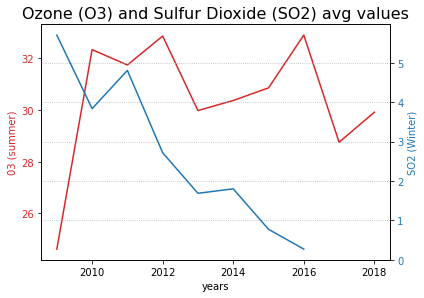

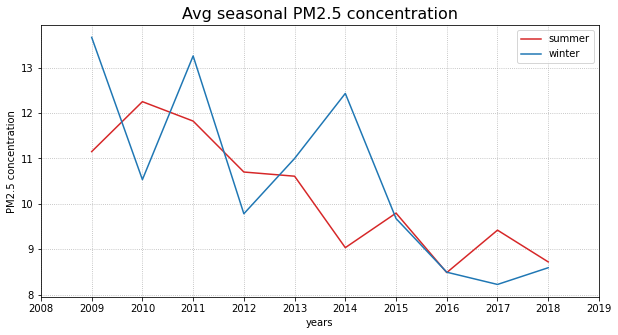

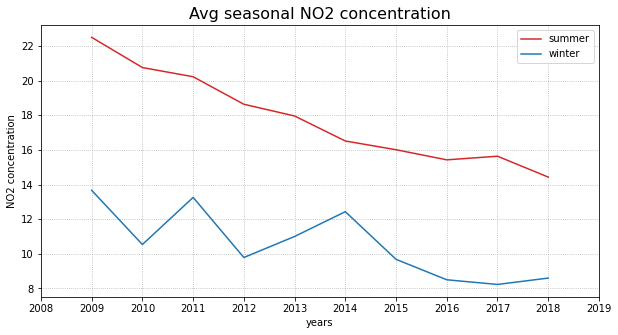

In [38]:
# Ozone (O3) and Sulfur Dioxide (SO2) avg values
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('years')
ax1.set_ylabel('03 (summer)', color=color)
ax1.plot(df_s_O3_grouped.index, df_s_O3_grouped.DataValue, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('SO2 (Winter)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_s_SO2_grouped.index, df_s_SO2_grouped.DataValue, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Ozone (O3) and Sulfur Dioxide (SO2) avg values', fontsize=16)
plt.grid(linestyle='dotted')
plt.show()

# Avg seasonal PM2.5 concentration
plt.figure(figsize=(10,5))
plt.plot(df_s_PM25_grouped_summer.index, df_s_PM25_grouped_summer.DataValue, color='tab:red', label='summer')
plt.plot(df_s_PM25_grouped_winter.index, df_s_PM25_grouped_winter.DataValue, color='tab:blue', label= 'winter')
plt.xticks(range(2008,2020))
plt.xlabel('years')
plt.ylabel('PM2.5 concentration')
plt.title('Avg seasonal PM2.5 concentration', fontsize=16)
plt.legend()
plt.grid(linestyle='dotted')
plt.show()

#Avg seasonal NO2 concentration
plt.figure(figsize=(10,5))
plt.plot(df_s_NO2_grouped_summer.index, df_s_NO2_grouped_summer.DataValue, color='tab:red', label='summer')
plt.plot(df_s_PM25_grouped_winter.index, df_s_PM25_grouped_winter.DataValue, color='tab:blue', label= 'winter')
plt.xticks(range(2008,2020))
plt.xlabel('years')
plt.ylabel('NO2 concentration')
plt.title('Avg seasonal NO2 concentration', fontsize=16)
plt.legend()
plt.grid(linestyle='dotted')
plt.show()